In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from sklearn.neighbors.nearest_centroid import NearestCentroid
from msslib.learn.cluster import CentroidVQ

from msslib.generate_data import *
from msslib.utils import *
from msslib.data import *
from msslib.learn.cluster import *

import random

In [3]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"
image_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/images/"    

out_1 = "/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_own/"
out_2 = "/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_scikit/"

label_paths = sorted(list(filter(lambda x: "RN" in x, listpaths(label_dir))))[6:]
image_paths = sorted(list(filter(lambda x: "RN" in x, listpaths(image_dir))))[6:]
path_pairs = list(zip(label_paths, image_paths))

In [4]:
split_at = 50
random.shuffle(path_pairs)
train = path_pairs[:split_at]
test = path_pairs[split_at:]

In [5]:
clf_1 = CentroidVQ()
clf_2 = NearestCentroid()

In [6]:
for l, d in train:
    X, y = random_observations_within_page(d, l)
    clf_1.fit(X, y)
    clf_2.fit(X, y)

In [7]:
for l, d in test:
    label_1, label_2 = perform_pair_rowwise_labelling(d, l, 
                                             lambda x: clf_1.predict(x), 
                                             lambda x: clf_2.predict(x)
                                            )
    label_out_1 = format_path(out_1, 'npy', only_basename(l))
    label_out_2 = format_path(out_2, 'npy', only_basename(l))
    np.save(label_out_1, label_1)
    np.save(label_out_2, label_2)

In [14]:
aye = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_own/VA067RN-0068.npy")
naw = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/pixels/nearest_centroid_scikit/VA067RN-0068.npy")

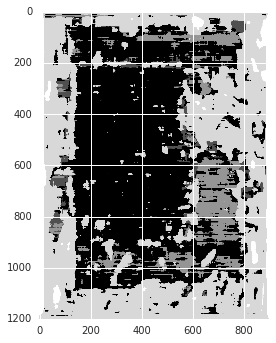

In [17]:
plt.imshow(aye)

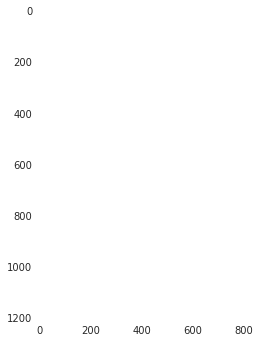

In [19]:
plt.imshow(label_1 == label_2)